In [49]:
import pandas as pd
file_path = "/content/seattle-weather.csv"
dataset = pd.read_csv(file_path)
print(dataset.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [50]:
print(dataset.shape)

(1461, 6)


In [51]:
print(dataset.columns)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [52]:
print(dataset.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [53]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [54]:
string_columns = ['weather']

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le


In [55]:
print(dataset.describe())

       precipitation     temp_max     temp_min         wind      weather
count    1461.000000  1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136     2.752225
std         6.680194     7.349758     5.023004     1.437825     1.191380
min         0.000000    -1.600000    -7.100000     0.400000     0.000000
25%         0.000000    10.600000     4.400000     2.200000     2.000000
50%         0.000000    15.600000     8.300000     3.000000     2.000000
75%         2.800000    22.200000    12.200000     4.000000     4.000000
max        55.900000    35.600000    18.300000     9.500000     4.000000


In [56]:
dataset = dataset.drop('date', axis=1)

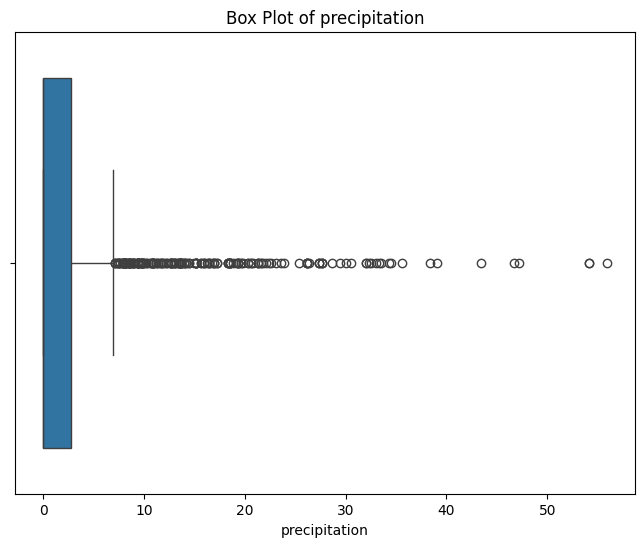

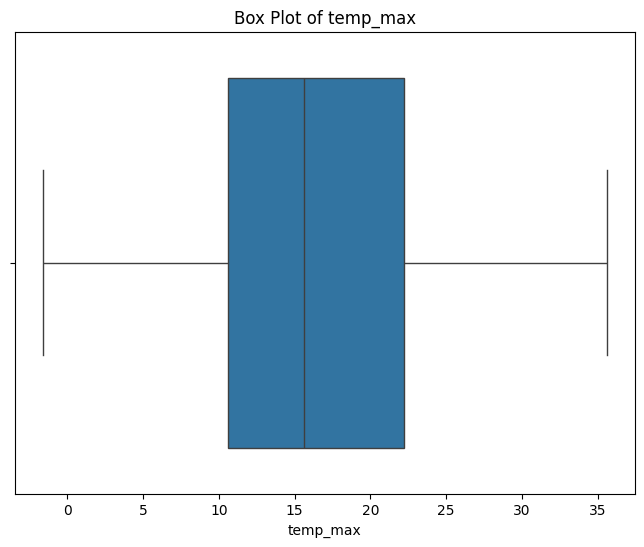

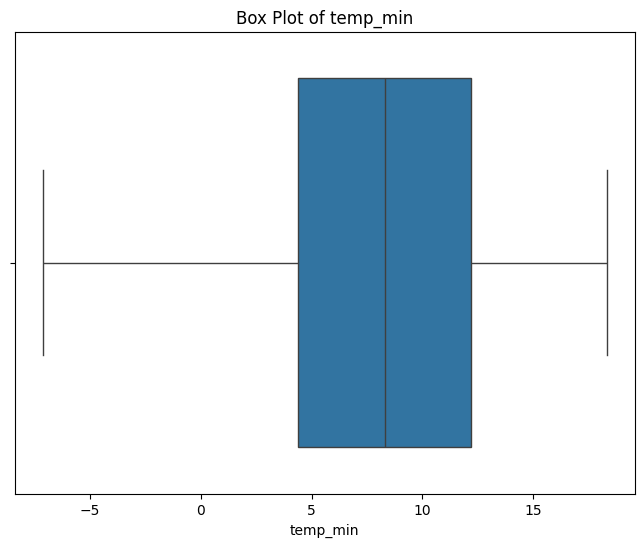

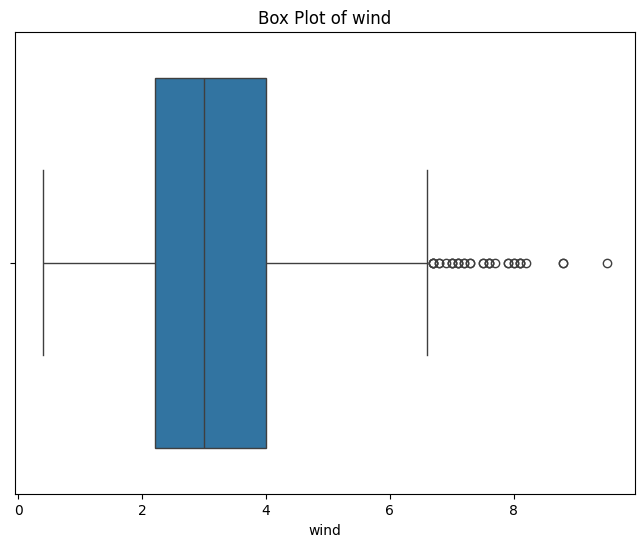

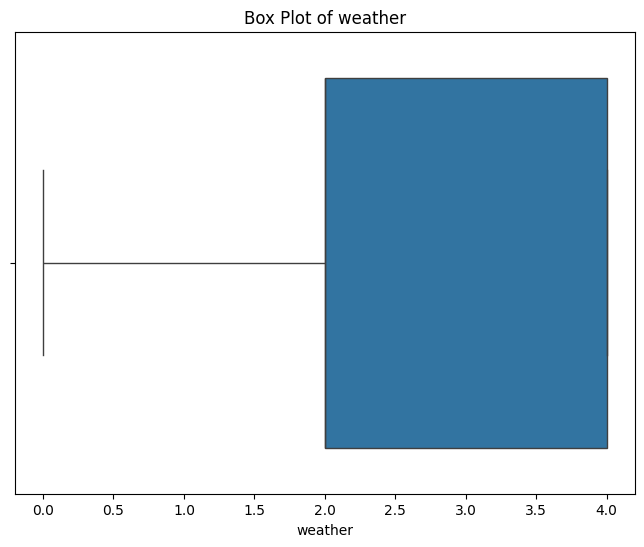

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
output_dir = "boxplots"
os.makedirs(output_dir, exist_ok=True)

for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=dataset[column])
        plt.title(f'Box Plot of {column}')
        file_path = os.path.join(output_dir, f"{column}_boxplot.png")
        plt.savefig(file_path)
        plt.show()
        plt.close()

In [58]:
import pandas as pd
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
dataset_no_outliers = remove_outliers_iqr(dataset, 'precipitation')
dataset_no_outliers = remove_outliers_iqr(dataset_no_outliers, 'wind')
numerical_cols = dataset.select_dtypes(include=np.number).columns
for col in numerical_cols:
    dataset = remove_outliers_iqr(dataset, col)

print(dataset.shape)


(1211, 5)


In [59]:
X = dataset.drop('weather', axis=1)
y = dataset['weather']


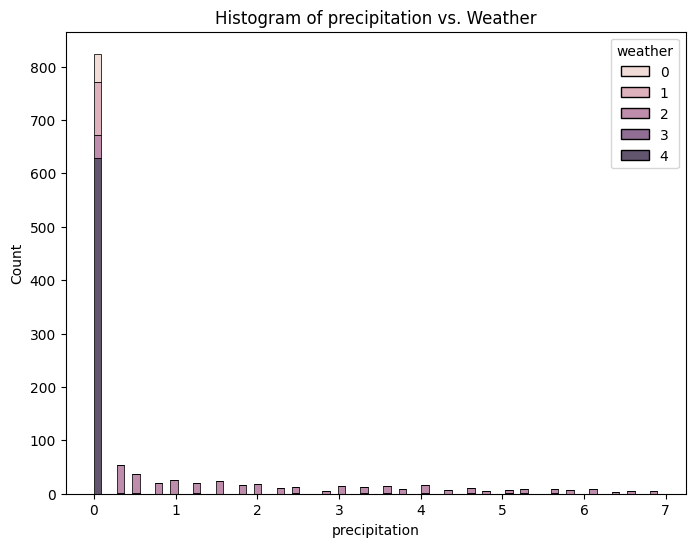

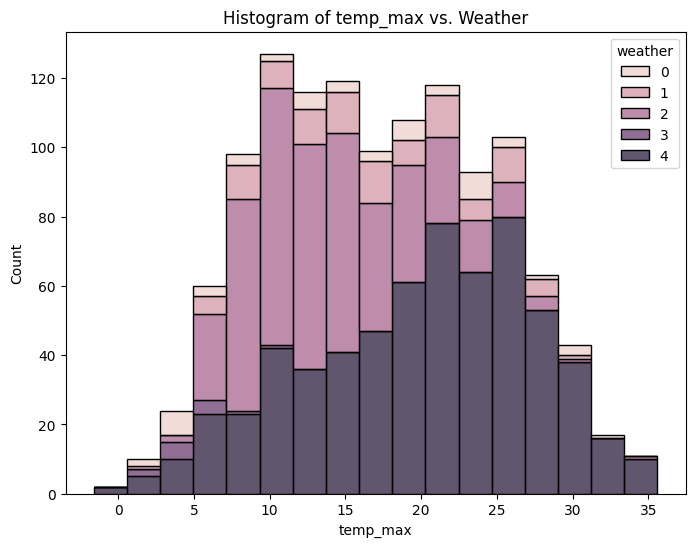

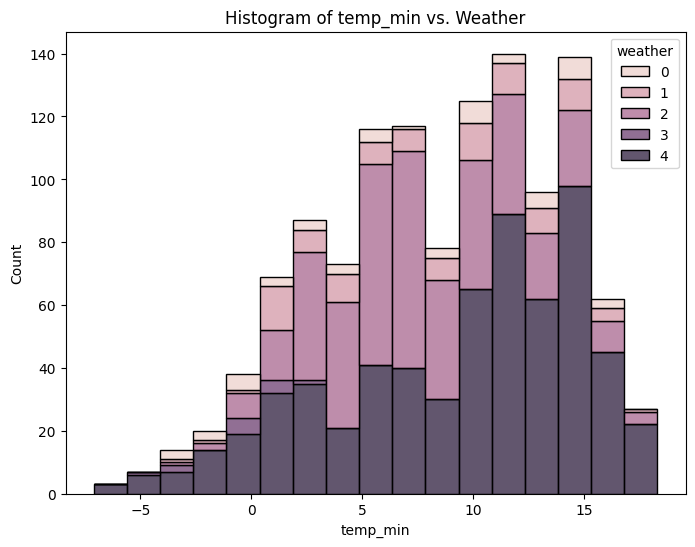

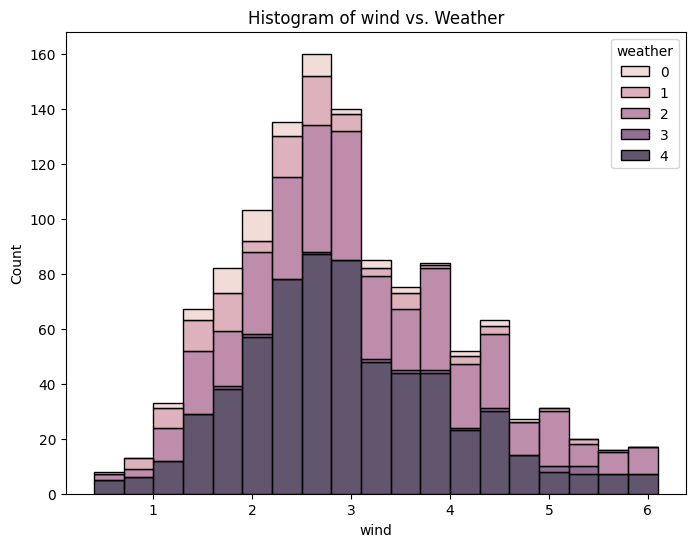

In [60]:
histogram_dir = "histograms"
os.makedirs(output_dir, exist_ok=True)

for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:
        if column != 'weather':
            plt.figure(figsize=(8, 6))
            sns.histplot(x=dataset[column], hue=dataset['weather'], multiple="stack")
            plt.title(f'Histogram of {column} vs. Weather')
            plt.savefig(os.path.join(histogram_dir, f"{column}_histogram.png"))
            plt.show()
            plt.close()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(847, 4) (847,) (364, 4) (364,)


In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy}")


Accuracy of the SVM model: 0.8324175824175825


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        30
           2       0.98      0.90      0.94       122
           3       1.00      0.33      0.50         3
           4       0.76      1.00      0.87       192

    accuracy                           0.83       364
   macro avg       0.55      0.45      0.46       364
weighted avg       0.74      0.83      0.78       364



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.8340679522497704


In [66]:

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


Accuracy of the Logistic Regression model: 0.8241758241758241


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        30
           2       0.98      0.88      0.93       122
           3       1.00      0.33      0.50         3
           4       0.76      1.00      0.86       192

    accuracy                           0.82       364
   macro avg       0.55      0.44      0.46       364
weighted avg       0.74      0.82      0.77       364



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))


RF Accuracy: 0.7912087912087912


In [69]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        30
           2       0.98      0.88      0.93       122
           3       1.00      0.33      0.50         3
           4       0.76      1.00      0.86       192

    accuracy                           0.82       364
   macro avg       0.55      0.44      0.46       364
weighted avg       0.74      0.82      0.77       364



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
import pickle
filename = 'model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))
